In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datasets

df_full = pd.read_csv("RSCCASN.csv")

In [3]:
df_full.head()

,realtime_start,realtime_end,date,value
0,2019-12-06,2019-12-06,1992-01-01,6938
1,2019-12-06,2019-12-06,1992-02-01,7524
2,2019-12-06,2019-12-06,1992-03-01,8475
3,2019-12-06,2019-12-06,1992-04-01,9401
4,2019-12-06,2019-12-06,1992-05-01,9558


In [4]:
# cut it into half

In [5]:
df = df_full.drop(["realtime_start","realtime_end"], axis = 1)

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
# reset the index to date and time as we seen in before tutorial

df.reset_index(inplace = True)
df.set_index("date",drop=False, inplace=True)

In [8]:
df.drop(["index","date"],inplace = True, axis = 1)
df.head()

,value
date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<AxesSubplot:xlabel='date'>

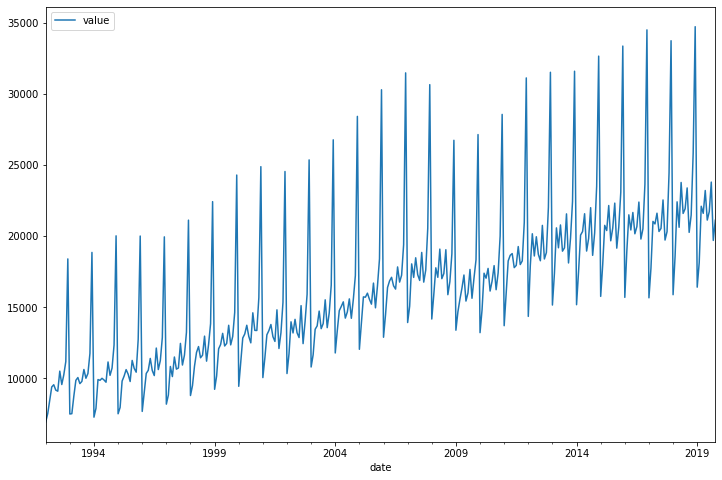

In [9]:
# visualizing the trends

df.plot(figsize = (12,8))

In [10]:
# length of dataframe

len(df)

334

In [11]:
# so based on the sessionality 


# so, it is the mondf

In [12]:
# so it is the month based 
# so 12 records means one year

In [13]:
test_size = 18       # 18 month
test_point = len(df)- test_size

In [14]:
train = df.iloc[:test_point]
test = df.iloc[test_point:]

In [15]:
train.shape, test.shape, df.shape

((316, 1), (18, 1), (334, 1))

In [16]:
test

,value
date,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [17]:
# scaling the data

In [18]:
from sklearn.preprocessing import MinMaxScaler


In [19]:
scaler = MinMaxScaler()

In [20]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [21]:
train_scaled.min(), test_scaled.max()

(0.0, 1.0081324426372351)

In [22]:
# timeseries convertor

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
length = 12  # 12 month
batch_size = 1

generator = TimeseriesGenerator(
                        train_scaled, train_scaled, length = length, batch_size= batch_size
)

In [25]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [26]:
train_scaled[:length], train_scaled[length]   # exactly like this

(array([[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]),
 array([0.02047633]))

In [27]:
# model creation

In [28]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [29]:
# lstm
lstm_layer = 100
n_feature = 1

model = Sequential([
    LSTM(lstm_layer, activation = "relu", input_shape = (length, n_feature)),
])

model.add(Dense(1))


In [30]:
model.compile(
            optimizer = "adam",
            loss = "mse"
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [32]:
# earlystopping

from tensorflow.keras.callbacks import EarlyStopping


In [33]:
early = EarlyStopping(monitor = "val_loss", patience = 2)

In [34]:
validation_generator = TimeseriesGenerator(
                                test_scaled, test_scaled, length = length, batch_size = batch_size
)

In [35]:
Model = model.fit_generator( generator, epochs= 25, validation_data= validation_generator, callbacks= [early])

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
304/304 [==============================] - 6s 11ms/step - loss: 0.0349 - val_loss: 0.0483
Epoch 2/25
304/304 [==============================] - 2s 7ms/step - loss: 0.0220 - val_loss: 0.0076
Epoch 3/25
304/304 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0687
Epoch 4/25
304/304 [==============================] - 2s 7ms/step - loss: 0.0150 - val_loss: 0.0043
Epoch 5/25
304/304 [==============================] - 2s 7ms/step - loss: 0.0022 - val_loss: 0.0181
Epoch 6/25
304/304 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 7/25
304/304 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 8/25
304/304 [==============================] - 2s 8ms/step - loss: 0.0012 - val_loss: 0.0018


<AxesSubplot:>

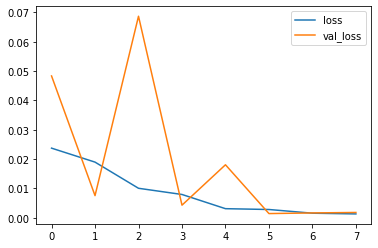

In [36]:
pd.DataFrame(Model.history).plot()

In [37]:
# we are using previous lecture code

In [38]:
# now, with for loop

test_prediction = []

first_test_batch = train_scaled[-length:]

# reshape
current_batch = first_test_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [39]:
true_prediction = scaler.inverse_transform(test_prediction)

In [41]:
test["prediction"] = true_prediction

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
test

,value,prediction
date,,
2018-05-01,23764,22346.337485
2018-06-01,21589,21029.371335
2018-07-01,21919,21283.895173
2018-08-01,23381,23285.142863
2018-09-01,20260,20615.436002
2018-10-01,21473,21290.513068
2018-11-01,25831,25669.690004
2018-12-01,34706,36559.818926
2019-01-01,16410,16608.159844


<AxesSubplot:xlabel='date'>

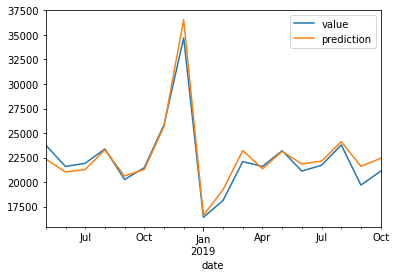

In [43]:
test.plot()

In [44]:
# now let's try to use and change the lstm layers

In [45]:
# let's scale entire datasets

In [46]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [48]:
scaled_full_data.min(), scaled_full_data.max()

(0.0, 0.9999999999999999)

In [49]:
# generator

In [50]:
length = 12
batch_size = 1

generator = TimeseriesGenerator(
                            scaled_full_data, scaled_full_data, length = length, batch_size= batch_size
)

In [51]:
# model

In [52]:
model = Sequential([
    LSTM(100, activation = "relu", input_shape = (length, n_feature))
])

model.add(Dense(1))


In [53]:
model.compile(
    optimizer= "adam",
    loss = "mse"
)

In [54]:
Model2 = model.fit_generator(generator, epochs = 8)

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
322/322 [==============================] - 5s 7ms/step - loss: 0.0324
Epoch 2/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0253
Epoch 3/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0117
Epoch 4/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0042
Epoch 5/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0019
Epoch 6/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0019
Epoch 7/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0016
Epoch 8/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0014


In [55]:
# now, with for loop

test_prediction = []

periods = 12

first_test_batch = scaled_full_data[-length:]

# reshape
current_batch = first_test_batch.reshape(1,length, n_feature)

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [56]:
forecast = scaler.inverse_transform(test_prediction)

In [57]:
forecast

array([[25859.1118741 ],
       [36007.69500446],
       [15968.96487284],
       [17486.1014328 ],
       [21404.04995441],
       [20918.35289335],
       [22665.43628883],
       [20582.830019  ],
       [21246.36640167],
       [23468.24563599],
       [19414.45294547],
       [20886.96262693]])

In [58]:
df

,value
date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [59]:
# to add these value to the timestamp on df data

In [62]:
forecast_index = pd.date_range(start= "2019-10-01", periods = periods ,freq = "MS")  # periods = 12 months , freq = months

In [63]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [64]:
# create a dataframe of results

In [65]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ["forecast"])

In [67]:
forecast_df.head()

,forecast
2019-10-01,25859.111874
2019-11-01,36007.695004
2019-12-01,15968.964873
2020-01-01,17486.101433
2020-02-01,21404.049954


In [68]:
# separate plotting

<AxesSubplot:>

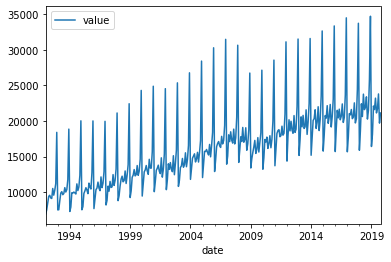

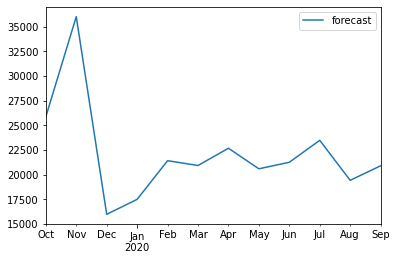

In [70]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='date'>

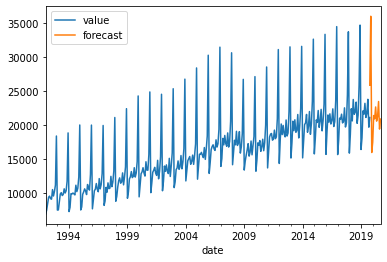

In [71]:
# same plot

ax = df.plot()
forecast_df.plot(ax = ax)

(576.0, 611.0)

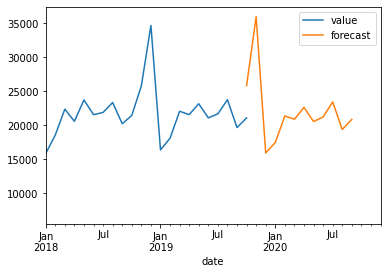

In [72]:
# same plot
# zoom in

ax = df.plot()
forecast_df.plot(ax = ax)

plt.xlim("2018-01-01","2020-12-01")